<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# 1.1 Import array-manipulation library
import numpy as np

# 1.2 Import tensorflow
import tensorflow as tf
from tensorflow import keras

In [14]:

# 1.3 Import keras subroutines for fetching the CIFAR-10 dataset
#     The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes,
#      with 6000 images per class. There are 50000 training images and 10000
#       test images.  They were collected by Alex Krizhevsky, Vinod Nair, and
#         Geoffrey Hinton. Classes are: airplane, automobile, bird, cat, deer,
#          dog, frog, horse, ship, truck

from keras.datasets import cifar10


In [15]:
# 1.4 Basic classes for specifying and training a neural network
#     Keras has two types of models Sequential and Model Class for complex models
#     Sequential models are essentially layer-by-layer. Model Class models may
#     also have branching.

from keras.models import Sequential


In [16]:
# 1.5 Import layers that will be used in modeling
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense


In [17]:
# 1.6 Keras utilities for one-hot encoding of ground truth values
from keras.utils import np_utils

In [18]:
# 1.7 Import keras optimizers unless you want default parameters
# from keras.optimizers import Adam

# 1.8
import os, time
import matplotlib.pyplot as plt
# %matplotlib inline


In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [19]:

#%%                                 B. Define needed constants

# 2.0 Set some hyperparameters

# 2.1
batch_size = 16   # A batch of 'batch_size' training examples is fed before 
                  #  every error correction  
# 2.1
num_epochs = 5    # Over the entire training set, we iterate 5 times 
                  # Thus per epoch, there will be (X_train.shape[0]/batch_size) batches
# 2.3
kernel_size = 3   # we will use 3x3 kernels throughout
# 2.4
pool_size = 2     # we will use 2x2 pooling throughout
# 2.5
conv_depth_1 = 32 # we will initially have 32 filters per conv. layer...
                  # Remember each filter extracts some structure from image data
# 2.6
conv_depth_2 = 64 # ...switching to 64 filters  the first pooling layer
# 2.7
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
# 2.8
drop_prob_2 = 0.5  # dropout in the FC layer with probability 0.5
# 2.9
hidden_size = 512  # the FC layer will have 512 neurons


In [20]:
#%%                     C. Fetch cifar10 images & transform
"""
About CIFAR-10 images
Ref: https://en.wikipedia.org/wiki/CIFAR-10
The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a
collection of images that are commonly used to train machine learning
and computer vision algorithms. It is one of the most widely used datasets
for machine learning research. The CIFAR-10 dataset contains 60,000 32x32
color images in 10 different classes. The 10 different classes represent
airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
There are 6,000 images of each class. (Alex Krizhevsky)
"""


'\nAbout CIFAR-10 images\nRef: https://en.wikipedia.org/wiki/CIFAR-10\nThe CIFAR-10 dataset (Canadian Institute For Advanced Research) is a\ncollection of images that are commonly used to train machine learning\nand computer vision algorithms. It is one of the most widely used datasets\nfor machine learning research. The CIFAR-10 dataset contains 60,000 32x32\ncolor images in 10 different classes. The 10 different classes represent\nairplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.\nThere are 6,000 images of each class. (Alex Krizhevsky)\n'

In [55]:
#  3. Download, unzip and divide into training/test data cifar10 images
#      By default download occurs at C:\Users\ashokharnal\.keras\datasets\
#      Or at /home/ashok/.keras/datasets ;  Downloaded file: cifar-10-batches-py.tar.gz.
#       Expanded in folder: cifar-10-batches-py
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape              # (50000, 32, 32, 3):50000 images, 32 X 32 pixels, 3-channels
y_train.shape              # (50000, 1)

(50000, 32, 32, 3)

(50000, 1)

In [56]:
# 3.1 Have a look at the data
X_train[0,:3, :3,0]  # Pixel intensity values in the  
                     #  slice of 3X3 from Ist image
                     #   and Ist channel         
y_train[:10,:]


array([[59, 43, 50],
       [16,  0, 18],
       [25, 16, 49]], dtype=uint8)

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [58]:
# Let us check min and max values
#  of pixel intensities
print(X_train.min())      # 0
print(X_train.max())      # 255

0
255


In [59]:

# 4. There are 50000 training examples in CIFAR-10
num_train, height, width, depth = X_train.shape

In [60]:
# 4.1 There are 10000 test examples in CIFAR-10
num_test = X_test.shape[0]
num_test

10000

In [64]:
np.unique(y_train).shape

(10,)

In [25]:
# 4.2 There are 10 image classes
num_classes = np.unique(y_train).shape[0]
num_classes

10

In [62]:
# 4.2.1 Class names are in alphabetical sequence

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [63]:

# 4.2 There are 10 image classes
num_classes = np.unique(y_train).shape[0]
class_names = ["airplane","automobile","bird",
               "cat","deer","dog","frog","horse",
               "ship","truck"]


In [28]:
# 5. See an image
i = 1
im1 = X_train[i]    # Get the ith image array
# 5.1 To which class does it belong
y_train[i]
k = class_names[y_train[i][0]]           # Get 0th element of y_train[1]


In [29]:
print(k)

truck


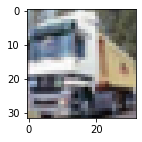

In [30]:
# 5.2 Plot the image
fig = plt.figure(figsize=(4,2))
plt.imshow(im1)                         # imshow() is a matplotlib method
plt.show()


In [31]:
# 5. Change array types and normalise
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train)              # Normalise data to [0, 1] range
X_test /= np.max(X_test)                # It is a global rather than column-wise (axis =0)
                                        # normalization


In [32]:
# 5.1 This is columnwise normalization
a = np.array([[2,3,4], [50,100,200]])
a = a/np.max(a, axis = 0)
a


array([[0.04, 0.03, 0.02],
       [1.  , 1.  , 1.  ]])

In [33]:

# 6. One-hot encode the labels
#    For all classification problems, even when num_classes is 2
#    use OHE with softmax layer. See VGG16 problem for 2-classes.
#    For two classes, you can also use one 'sigmoid' at the output
#    without earlier performing OHE. See VGG16 problem for 2-classes.

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_train[:5, :]
y_train[:5]
Y_test = np_utils.to_categorical(y_test, num_classes)
Y_test[:3,:4]



array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [34]:
#%%                               D. Model building

# 7. Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
#    Same padding means the size of output feature-maps are the same as
#    the input feature-maps (under the assumption of stride=1)
#    padding= "SAME" tries to pad evenly left and right, but if the amount
#    of columns to be added is odd, it will add the extra column to the right
# 7.1
# See keras layers: https://keras.io/layers/about-keras-layers/
model = Sequential()
model.add(Convolution2D(conv_depth_2,                            # 32 filters
                       (kernel_size, kernel_size),               # 3 X 3
                       padding='same',                           # Do zero padding
                       activation='relu',
                       input_shape=(height, width, depth)        # 32 X 32 X 3
                       )
           )


In [35]:
#7.1.1
model.add(Convolution2D(conv_depth_1,
                       (kernel_size, kernel_size),
                        padding='valid',
                        activation='relu')
                        )


In [36]:
# 7.1.2
model.add(MaxPooling2D(
	                   pool_size=(pool_size, pool_size))         # 2 X 2
                      )


In [37]:
# 7.1.3
# https://keras.io/layers/core/#dropout
model.add(Dropout(
	              drop_prob_1                                    # 0.25
	             )
                 )


In [38]:
# 7.2 Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
#     Fully connected layer
#    https://keras.io/layers/core/#flatten
model.add(Flatten())


In [39]:
# 7.2.1 Output of this dense layer: Ist hidden layer
#       https://keras.io/layers/core/#dense
"""
Dense implements the operation:
   output = activation(dot(input, kernel) + bias)
   where activation is the element-wise activation function
   passed as the activation argument, kernel is a weights matrix
   created by the layer, and bias is a bias vector created by the
   layer (only applicable if use_bias is True).
   Size of output has to be specified
"""


'\nDense implements the operation:\n   output = activation(dot(input, kernel) + bias)\n   where activation is the element-wise activation function\n   passed as the activation argument, kernel is a weights matrix\n   created by the layer, and bias is a bias vector created by the\n   layer (only applicable if use_bias is True).\n   Size of output has to be specified\n'

In [40]:

model.add(Dense(hidden_size, activation='relu'))   # output size = hidden_size

model.add( Dropout
	             (
	             drop_prob_2                                      # 0.5
	             )
	             )


In [41]:
# 7.2.2 Final output layer; softmax
#       About softmax: https://en.wikipedia.org/wiki/Softmax_function
#       exp(xi)/Sigma(exp(xk))
"""
Softmax
    If we take an input of [1, 2, 3, 4, 1, 2, 3], the softmax of that
    is [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]. The output
    has most of its weight where the '4' was in the original input.
    This is what the function is normally used for: to highlight the
    largest values and suppress values which are significantly below
    the maximum value.
    See calculations at the end of his code.
"""


"\nSoftmax\n    If we take an input of [1, 2, 3, 4, 1, 2, 3], the softmax of that\n    is [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]. The output\n    has most of its weight where the '4' was in the original input.\n    This is what the function is normally used for: to highlight the\n    largest values and suppress values which are significantly below\n    the maximum value.\n    See calculations at the end of his code.\n"

In [42]:

model.add(
         Dense(num_classes,
         activation='softmax'
         )
         )


In [43]:
# 7.3 Compile model and add necesary parameters
#     Cross entropy: http://203.122.28.230/moodle/mod/url/view.php?id=1409
#
model.compile(loss='categorical_crossentropy',            # using the cross-entropy loss function
              optimizer='adam',                           # using the Adam optimiser
                                                          # Ref: https://keras.io/optimizers/
                                                          # keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
              metrics=['accuracy'])                       # reporting the accuracy


In [45]:

#%%                              E. Model training and evaluation
# 8. ...holding out 10% of the data for validation. 26 minutes
#       To save time consider just 20000 samples for training
#       10% of these, ie 2000 are for validation

# 8.1
X_train.shape
Y_train.shape


(50000, 10)

In [46]:
# 8.2  Takes 20 minutes
#      Specify fit/train hyperparameters
start = time.time()
history = model.fit(X_train[:20000],   # Train model using limited training data
                    Y_train[:20000],
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1
                    )
end = time.time()
print ((end - start)/60)


Epoch 1/5
1125/1125 [==============================] - 103s 91ms/step - loss: 1.8628 - accuracy: 0.3153 - val_loss: 1.3667 - val_accuracy: 0.5135
Epoch 2/5
1125/1125 [==============================] - 103s 92ms/step - loss: 1.3174 - accuracy: 0.5307 - val_loss: 1.2278 - val_accuracy: 0.5660
Epoch 3/5
1125/1125 [==============================] - 104s 92ms/step - loss: 1.1150 - accuracy: 0.6032 - val_loss: 1.1834 - val_accuracy: 0.5935
Epoch 4/5
1125/1125 [==============================] - 103s 92ms/step - loss: 0.9846 - accuracy: 0.6504 - val_loss: 1.1210 - val_accuracy: 0.6060
Epoch 5/5
1125/1125 [==============================] - 103s 92ms/step - loss: 0.8466 - accuracy: 0.7050 - val_loss: 1.1508 - val_accuracy: 0.6130
8.616279705365498


In [ ]:

# 8.3 Certain parameters are associated
#     with 'history' object
history.epoch
history.params


In [ ]:

# 8.4 How accuracy changes as epochs increase
#     We will use this function agai and again
#     in subsequent examples

def plot_history():
    val_acc = history.history['val_acc']
    tr_acc=history.history['acc']
    epochs = range(1, len(val_acc) +1)
    plt.plot(epochs,val_acc, 'b', label = "Validation accu")
    plt.plot(epochs, tr_acc, 'r', label = "Training accu")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

